<a href="https://colab.research.google.com/github/Aditri-07/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_ML_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
gg_data=pd.read_csv('GOOG.csv')
gg_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [41]:
gg_data=gg_data[['date','close']]
gg_data

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71
...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09
1254,2021-06-08 00:00:00+00:00,2482.85
1255,2021-06-09 00:00:00+00:00,2491.40
1256,2021-06-10 00:00:00+00:00,2521.60


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import datetime
def str_to_datetime(s):
    date_part=s.split(' ')[0]
    split = date_part.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('2015-01-01')
datetime_object

datetime.datetime(2015, 1, 1, 0, 0)

In [44]:
gg_data['date']=gg_data['date'].apply(str_to_datetime)
gg_data

<ipython-input-44-c875f50b7760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg_data['date']=gg_data['date'].apply(str_to_datetime)


,date,close
0,2016-06-14,718.27
1,2016-06-15,718.92
2,2016-06-16,710.36
3,2016-06-17,691.72
4,2016-06-20,693.71
...,...,...
1253,2021-06-07,2466.09
1254,2021-06-08,2482.85
1255,2021-06-09,2491.40
1256,2021-06-10,2521.60


In [45]:
gg_data.index=gg_data.pop('date')
gg_data

,close
date,
2016-06-14,718.27
2016-06-15,718.92
2016-06-16,710.36
2016-06-17,691.72
2016-06-20,693.71
...,...
2021-06-07,2466.09
2021-06-08,2482.85
2021-06-09,2491.40


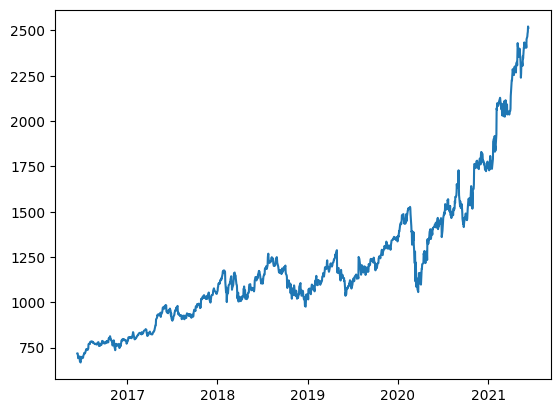

In [46]:
import matplotlib.pyplot as plt
#gg_data.plot.line(y='close',use_index=True)
plt.plot(gg_data.index, gg_data['close'])
plt.show()

In [47]:
import numpy as np

def gg_data_to_windowed_gg_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    gg_data_subset = dataframe.loc[:target_date].tail(n+1)

    if len(gg_data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = gg_data_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_gg_data = pd.DataFrame({})
  ret_gg_data['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_gg_data[f'Target-{n-i}'] = X[:, i]

  ret_gg_data['Target'] = Y

  return ret_gg_data

windowed_gg_data = gg_data_to_windowed_gg_data(gg_data,
                                '2020-06-11',
                                '2021-06-11',
                                n=3)
windowed_gg_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-06-11,1446.61,1456.16,1465.85,1403.84
1,2020-06-12,1456.16,1465.85,1403.84,1413.18
2,2020-06-15,1465.85,1403.84,1413.18,1419.85
3,2020-06-16,1403.84,1413.18,1419.85,1442.72
4,2020-06-17,1413.18,1419.85,1442.72,1451.12
...,...,...,...,...,...
248,2021-06-07,2421.28,2404.61,2451.76,2466.09
249,2021-06-08,2404.61,2451.76,2466.09,2482.85
250,2021-06-09,2451.76,2466.09,2482.85,2491.40
251,2021-06-10,2466.09,2482.85,2491.40,2521.60


In [48]:
def windowed_gg_data_to_date_X_y(windowed_dataframe):
  gg_data_as_np = windowed_dataframe.to_numpy()

  dates = gg_data_as_np[:, 0]

  middle_matrix = gg_data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = gg_data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_gg_data_to_date_X_y(windowed_gg_data)

dates.shape, X.shape, y.shape

((253,), (253, 3, 1), (253,))

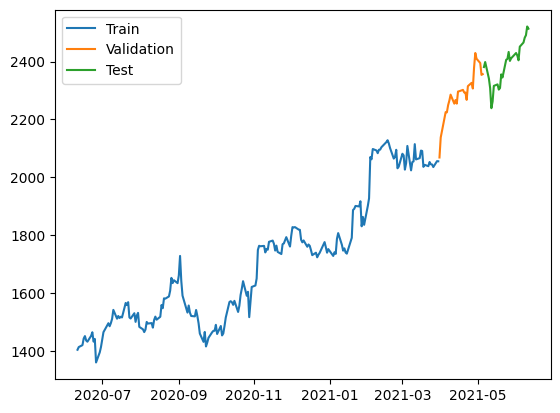

In [49]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam

# Feature engineering
gg_data['close_lag1'] = gg_data['close'].shift(1)
gg_data['close_lag7'] = gg_data['close'].shift(7)
gg_data = gg_data.dropna()

# Prepare data for LSTM
features = ['close', 'close_lag1', 'close_lag7']
X = gg_data[features].values
y = gg_data['close'].values  # Target variable

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Reshape for LSTM
X_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])

# Split data
train_size = int(len(X_reshaped) * 0.8)
val_size = int(len(X_reshaped) * 0.1)  # Calculate validation size

X_train, X_val, X_test = X_reshaped[:train_size], X_reshaped[train_size:train_size+val_size], X_reshaped[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Ensure the dates match the reshaped data
dates_train, dates_val, dates_test = gg_data.index[:train_size], gg_data.index[train_size:train_size+val_size], gg_data.index[train_size+val_size:]

# LSTM model
model = Sequential([
    Input((1, 3)),  # Timesteps = 1, Features = 3
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for a single prediction
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Make predictions
y_pred_normalized = model.predict(X_test)

# Inverse transform the normalized predictions using the output scaler
scaler_output = MinMaxScaler()
scaler_output.fit(y.reshape(-1, 1))  # Fit on original y values
y_pred = scaler_output.inverse_transform(y_pred_normalized)[:, 0]

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

<ipython-input-52-f1ea8de214ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg_data['close_lag1'] = gg_data['close'].shift(1)
<ipython-input-52-f1ea8de214ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg_data['close_lag7'] = gg_data['close'].shift(7)


Epoch 1/50
32/32 [==============================] - 7s 70ms/step - loss: 1175178.1250 - mean_absolute_error: 1067.3099 - val_loss: 2495908.7500 - val_mean_absolute_error: 1575.2856
Epoch 2/50
32/32 [==============================] - 0s 14ms/step - loss: 1173091.0000 - mean_absolute_error: 1066.3551 - val_loss: 2487021.2500 - val_mean_absolute_error: 1572.4772
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: 1164363.2500 - mean_absolute_error: 1062.3937 - val_loss: 2451315.5000 - val_mean_absolute_error: 1561.1508
Epoch 4/50
32/32 [==============================] - 1s 18ms/step - loss: 1135876.2500 - mean_absolute_error: 1049.3254 - val_loss: 2344898.0000 - val_mean_absolute_error: 1526.8977
Epoch 5/50
32/32 [==============================] - 1s 18ms/step - loss: 1063080.3750 - mean_absolute_error: 1015.3142 - val_loss: 2104769.7500 - val_mean_absolute_error: 1446.6001
Epoch 6/50
32/32 [==============================] - 0s 15ms/step - loss: 917149.1250 - mean_abs

32/32 [==============================] - 0s 5ms/step
Shapes:  (995,) (995,) (995,)


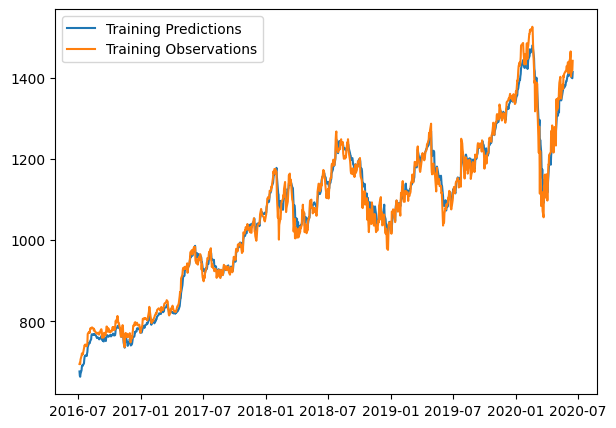

In [59]:
train_predictions = model.predict(X_train).flatten()
print("Shapes: ", dates_train.shape, train_predictions.shape, y_train.shape)

plt.figure(figsize=(7,5))
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step


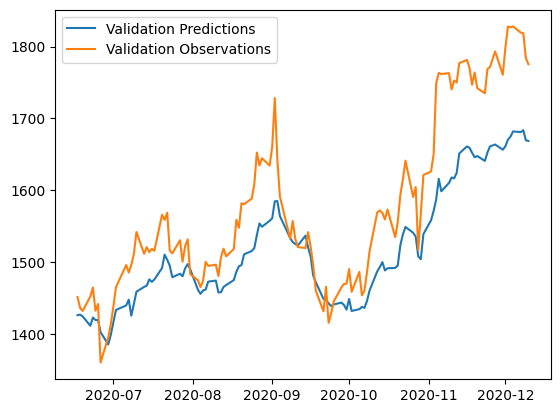

In [54]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


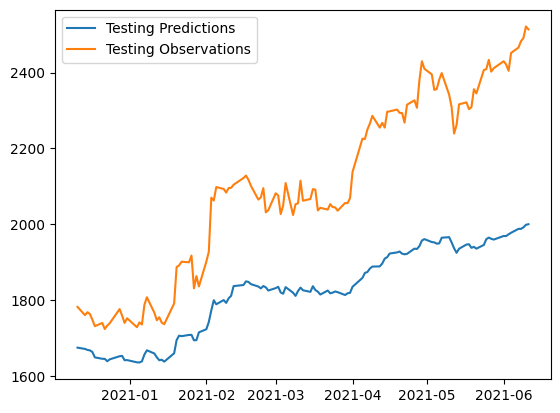

In [55]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

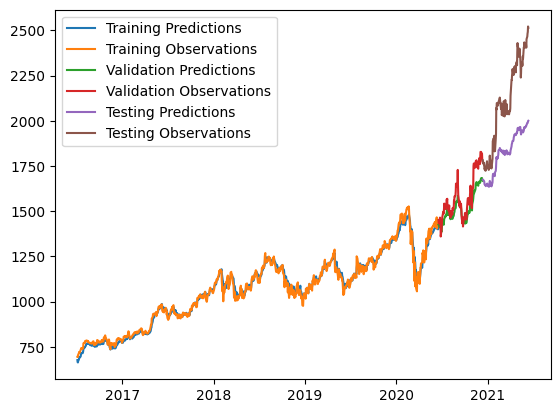

In [56]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [57]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


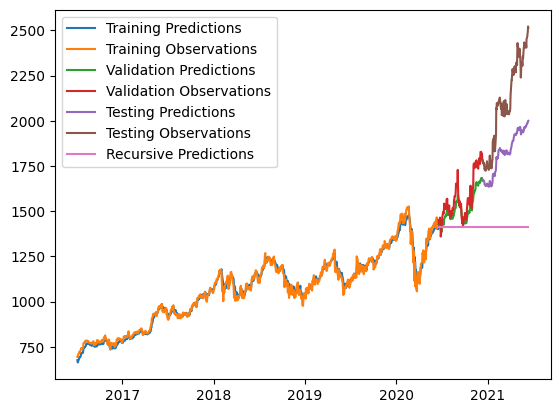

In [58]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])